###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Exercise: How to sail without wind 

Imagine, the Bsc-students of the "Differential Equations in the Earth System" course are organizing a sailing trip in the Kiel Bay area and baltic sea. Unfortunately, the strong wind gusts predicted by the meteorologists, become not even a small breeze. Sometimes even physicists are not able to predict the future. We will learn why in the next lecture.

Fortunately, the oceanographers can deliver sea current data of the specified area. So how can the students sail without wind and stay on course? By letting their thoughts and boat drift and solving the simplest, uncoupled ordinary differential equation, I can imagine.

## Governing equations

The velocity vector field ${\bf{V}} = (v_x,v_y)^T$ is componentwise related to the spatial coordinates ${\bf{x}} = (x,y)^T$ by 

\begin{equation}
v_x = \frac{dx}{dt},\; v_y = \frac{dy}{dt}
\end{equation}

To estimate the drift or **streamline** of our boat in the velocity vector field $\bf{V}$, starting from an initial position ${\bf{x_0}} = (x_0,y_0)^T$, we have to solve the uncoupled ordinary differential equations using the finite difference method introduced at the beginning of this class.

Approximating the temporal derivatives in eqs. (1) using the **backward FD operator**

\begin{equation}
\frac{df}{dt} \approx \frac{f(t)-f(t-dt)}{dt} \notag
\end{equation}

with the time sample interval $dt$ leads to 

\begin{equation}
\begin{split}
v_x &= \frac{x(t)-x(t-dt)}{dt}\\
v_y &= \frac{y(t)-y(t-dt)}{dt}\\
\end{split}
\notag
\end{equation}

After solving for $x(t), y(t)$, we get the **explicit time integration scheme**:

\begin{equation}
\begin{split}
x(t) &= x(t-dt) + dt\; v_x\\
y(t) &= y(t-dt) + dt\; v_y\\
\end{split}
\notag
\end{equation}

and by introducing a temporal dicretization $t^n = n * dt$ with $n \in [0,1,...,nt]$, where $nt$ denotes the maximum time steps, the final FD code becomes:

\begin{equation}
\begin{split}
x^n &= x^{n-1} + dt\; v_x^{n-1}\\
y^n &= y^{n-1} + dt\; v_y^{n-1}\\
\end{split}
\end{equation}

These equations simply state, that we can extrapolate the next position of our boat $(x^{(n)},y^{(n)})^T$ in the velocity vector field based on the position at a previous time step $(x^{(n-1)},y^{(n-1)})^T$, the velocity field at this previous position $(v_x^{(n-1)},v_y^{(n-1)})^T$ and a predefined time step $dt$. Before implementing the FD scheme in Python, let 's try to find a simple velocity vector field ...

## Boring velocity vector field 

We should start with a simple, boring velocity vector field, where we can easily predict the drift of the boat. Let's take - this:

\begin{equation}
{\bf{V}} = (y/1000,-x/1000)^T \notag
\end{equation}

and visualize it with Matplotlib using a `Streamplot`. First, we load all required libraries ...

In [2]:
# Import Libraries 
# ----------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

... and define the coordinates for the `Streamplot`:

In [3]:
dh = 50.
x1 = -1000.
x2 = 1000.
X, Y = np.meshgrid(np.arange(x1, x2, dh), np.arange(x1, x2, dh))

For more flexibility and avoid code redundances later on, we write a short function, which evaluates the velocity components $(v_x,v_y)^T$ at a given position $(x,y)^T$

In [4]:
# compute velocity components V = (vx/1000,vy/1000)^T at position x,y
def vel_xy(x,y):
    
    vx = y / 1000.
    vy = -x / 1000.
    
    return vx, vy

After these preparations, we can plot the velocity vector field

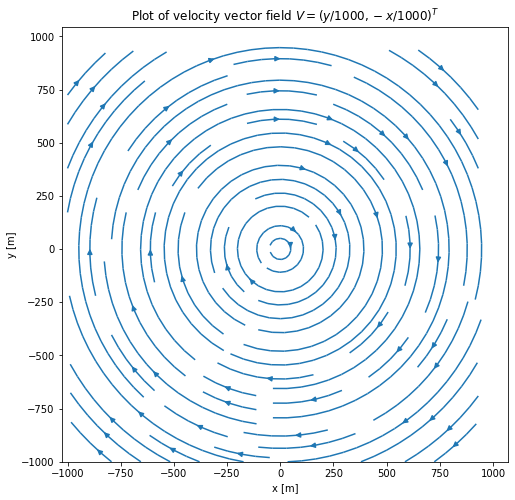

In [5]:
# Define figure size
rcParams['figure.figsize'] = 8, 8

fig1, ax1 = plt.subplots()

# Define vector field components for coordinates X,Y
VX,VY = vel_xy(X,Y)

ax1.set_title(r'Plot of velocity vector field $V=(y/1000,-x/1000)^T$')
plt.axis('equal')
Q = ax1.streamplot(X,Y,VX,VY)

plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.savefig('Plot_vector_field_V_boring.pdf', bbox_inches='tight', format='pdf')
plt.show()

So the velocity vector field ${\bf{V}} = (y/1000,-x/1000)^T$ is simply a large vortex with zero velocity at the origin and linear increasing velocities with distance.

### Sailing in the boring vector field $V =(y/1000,-x/1000)^T$

Next, we want to predict our sailing course in this large vortex. Eventhough it is unrealistic, we assume, that such a large vortex exists in the [Kiel Fjord](https://en.wikipedia.org/wiki/Kieler_F%C3%B6rde#/media/File:Kiel_Luftaufnahme.JPG), maybe related to some suspicous, top secret activity in the Kiel military harbor.

##### Exercise 1

Complete the following Python code `sailing_boring`, to predict the sailing course in the boring velocity vector field $V =(y/1000,-x/1000)^T$. Most of the code is already implemented, you only have to add the FD solution of the uncoupled, ordinary differential equations (2):

In [ ]:
def sailing_boring(tmax, dt, x0, y0):
    
    # Compute number of time steps based on tmax and dt
    nt = (int)(tmax/dt)
    
    # vectors for storage of x, y positions
    x  = np.zeros(nt + 1)
    y  = np.zeros(nt + 1)
    
    # define initial position
    x[0] = x0
    y[0] = y0
    
    # start time stepping over time samples n
    for n in range(1,nt + 1):
    
        # compute velocity components at current position
        vx, vy = vel_xy(x[n-1],y[n-1])
    
        # compute new position using FD approximation of time derivative
        # ADD FD SOLUTION OF THE UNCOUPLED, ORDINARY DIFFERENTIAL EQUATIONS (2) HERE!
        x[n] = 
        y[n] =
        
    # Define figure size
    rcParams['figure.figsize'] = 8, 8

    fig1, ax1 = plt.subplots()
    
    # Define vector field components for Streamplot
    VX,VY = vel_xy(X,Y)
    
    ax1.set_title(r'Streamplot of vector field $V=(y/1000,-x/1000)^T$')
    plt.axis('equal')
    Q = ax1.streamplot(X,Y,VX,VY)
    plt.plot(x,y,'r-',linewidth=3)
    
    # mark initial and final position
    plt.plot(x[0],y[0],'ro')
    plt.plot(x[nt],y[nt],'go')

    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

    plt.savefig('sailing_boring.pdf', bbox_inches='tight', format='pdf')
    plt.show()    

##### Exercise 2

After completing the FD code `sailing_boring`, we can define some basic modelling parameters. How long do you want to sail, defined by the parameter $tmax [s]$. What time step $dt$ do you want to use? $dt=1.\;s$ should work for the first test of your FD code. To solve the problem you also have to define the initial position of your boat. Let's assume that ${\bf{x_{0}}}=(-900,0)^T$ is the location of some jetty on the western shore of the Kiel Fjord.

By executing the cell below (`SHIFT+ENTER`), the FD code `sailing_boring` should compute the course of the boat and plot it as red line on top of the `Streamplot`. Inital and final position are defined by a red and green dot, respectively. 

What course would you expect, based on the `Streamplot`? Is it confirmed by your FD code solution? If not, there might be an error in your FD implementation.

In [ ]:
# How long do you want to sail [s] ? 
tmax = 1000

# Define time step dt
dt = 1.

# Define initial position
x0 = -900.
y0 = 0.

# Sail for tmax s in the boring vector field
sailing_boring(tmax, dt, x0, y0)

##### Exercise 3

At this point you might get an idea why the code is called `sailing_boring`. We start at the western shore of the Kiel Fjord, follow an enclosed streamline to the eastern shore and travel back to the initial position of the jetty - it 's a boring Kiel harbor tour. 

How long will the boring tour actually take? Vary $tmax$ until the green dot of the final position coincides with the red dot of the initial position.

You also might think: why should I invest so much computation time into this boring tour. 
Copy the cell above, below this text box and increase the time step $dt$ to 20 s. How does the new FD solution differ from the one above with $dt=1\; s$? Give a possible explanation.

### Sailing in the more exciting vector field $V=(cos((x+y)/500),sin((x-y)/500))^T$

Time to sail in a more complex and exciting velocity vector field, like this one:

\begin{equation}
V=(cos((x+y)/500),sin((x-y)/500))^T \notag
\end{equation}

As in the case of the boring vector field, we define a function to compute the velocity components for a given ${\bf{x}} = (x,y)^T$:

In [6]:
# define new vector field 
def vel_xy_1(x,y):
    
    vx = np.cos((x+y)/500)
    vy = np.sin((x-y)/500)    
    
    return vx, vy

For the visualization of this more complex vector field, I recommend to use a `Quiver` instead of the `Streamplot`

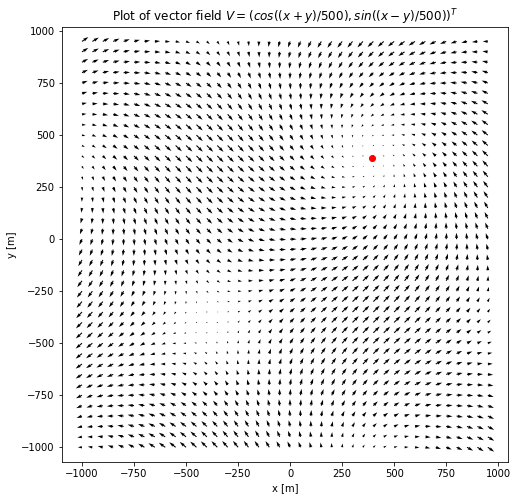

In [7]:
# Define figure size
rcParams['figure.figsize'] = 8, 8

fig1, ax1 = plt.subplots()

# Define vector field components for coordinates X,Y
VX,VY = vel_xy_1(X,Y)

ax1.set_title(r'Plot of vector field $V=(cos((x+y)/500),sin((x-y)/500))^T$')
plt.axis('equal')
Q = ax1.quiver(X,Y,VX,VY)
plt.plot(392,392,'ro')

plt.xlabel('x [m]')
plt.ylabel('y [m]')

#plt.savefig('Plot_vector_field_V_exciting.pdf', bbox_inches='tight', format='pdf')
plt.show()

##### Exercise 4

Now, this velocity vector field looks more exciting, than the previous one. The red dot at ${\bf{x_{island}}}=(392,392)^T$ marks the location of an island you want to reach. To compute the course, we can recycle most parts of the `sailing_boring` code. 

- Rename the code below from `sailing_boring` to `sailing_exciting`
- Add the FD solution of the uncoupled, ordinary differential equations (2) to the code
- Replace in the new `sailing_exciting` code the function calls of the boring velocity field `vel_xy` by the new exciting velocity field `vel_xy_1`
- Replace in `sailing_exciting` the `Streamplot` by a `Quiver` plot.
- Mark the position of the island by a red dot by inserting 
```python
plt.plot(392,392,'ro')
```
below the `Quiver` plot in `sailing_exciting` 

In [ ]:
def sailing_boring(tmax, dt, x0, y0):
    
    # Compute number of time steps
    nt = (int)(tmax/dt)
    
    # vectors for storage of x, y positions
    x  = np.zeros(nt + 1)
    y  = np.zeros(nt + 1)
    
    # define initial position
    x[0] = x0
    y[0] = y0
    
    # start time stepping
    for n in range(1,nt + 1):
    
        # compute velocity components at current position
        vx, vy = vel_xy(x[n-1],y[n-1])
    
        # compute new position using FD approximation of time derivative
        # ADD FD SOLUTION OF THE UNCOUPLED, ORDINARY DIFFERENTIAL EQUATIONS (2) HERE!
        x[n] =
        y[n] =
        
    # Define figure size
    rcParams['figure.figsize'] = 8, 8

    fig1, ax1 = plt.subplots()

    # Define vector field components for quiver plot
    VX,VY = vel_xy(X,Y)

    ax1.set_title(r'Plot of vector field $V=(cos((x+y)/500),sin((x-y)/500))^T$')
    plt.axis('equal')
    Q = ax1.streamplot(X,Y,VX,VY)
    plt.plot(x,y,'r-',linewidth=3)
    
    # mark initial and final position
    plt.plot(x[0],y[0],'ro')
    plt.plot(x[nt],y[nt],'go')
    
    print(x[nt],y[nt])

    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

    plt.savefig('sailing_exciting.pdf', bbox_inches='tight', format='pdf')
    plt.show()    

##### Exercise 5

Time to sail to the island. To make the problem more interesting, you have to find a course to the island from the north, south, east and west boundaries. In the four cells below the x0 and y0 coordinates of the given boundary is already defined. You only have to add and change the missing coordinate vector component until you reach the island. You might also have to modify $tmax$.

**Approach from the northern boundary**

In [ ]:
# How long do you want to sail [s] ? 
tmax = 1000

# Define time step dt
dt = 2.

# DEFINE INTIAL POSITION AT NORTHERN BOUNDARY HERE!
x0 = 
y0 = 950.

# Sail for tmax s in the boring vector field
sailing_exciting(tmax, dt, x0, y0)

**Approach from the southern boundary**

In [ ]:
# How long do you want to sail [s] ? 
tmax = 1000

# Define time step dt
dt = 2.

# DEFINE INTIAL POSITION AT SOUTHERN BOUNDARY HERE!
x0 = 
y0 = -980.

# Sail for tmax s in the boring vector field
sailing_exciting(tmax, dt, x0, y0)

**Approach from the western boundary**

In [ ]:
# How long do you want to sail [s] ? 
tmax = 1000

# Define time step dt
dt = 2.

# DEFINE INTIAL POSITION AT WESTERN BOUNDARY HERE!
x0 = -950.
y0 = 

# Sail for tmax s in the boring vector field
sailing_exciting(tmax, dt, x0, y0)

**Approach from the eastern boundary**

In [ ]:
# How long do you want to sail [s] ? 
tmax = 1000

# Define time step dt
dt = 2.

# DEFINE INTIAL POSITION AT EASTERN BOUNDARY HERE!
x0 = 990.
y0 = 

# Sail for tmax s in the boring vector field
sailing_exciting(tmax, dt, x0, y0)

##### Bonus Exercise 

How do you reach the blue island in the vector plot below?

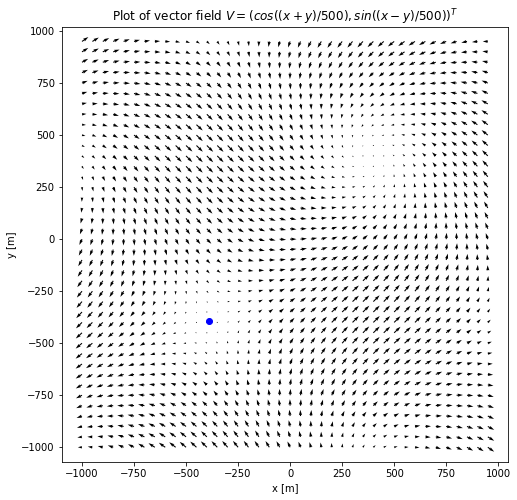

In [8]:
# Define figure size
rcParams['figure.figsize'] = 8, 8

fig1, ax1 = plt.subplots()

# Define vector field components for coordinates X,Y
VX,VY = vel_xy_1(X,Y)

ax1.set_title(r'Plot of vector field $V=(cos((x+y)/500),sin((x-y)/500))^T$')
plt.axis('equal')
Q = ax1.quiver(X,Y,VX,VY)
plt.plot(-392,-392,'bo')

plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.show()

## What we learned

- How to solve a simple system of ordinary differential equations by an explicit time integration scheme

- The long-term impact of small inaccuracies in time integration schemes by choosing a too large time step $dt$

- The solution to a problem is not only defined by a differential equation, but also by an initial condition

- How to sail without wind, by using flow data and numerical solutions of ordinary differential equations